# Persistent Cohomology

The idea for this notebook is to excecute the examples and understand how the library *Dionysus2* (https://github.com/mrzv/dionysus) works. Here it goes:

In [5]:
#Imports MAtplotlib and a little bit of setup
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style()
jtplot.style(theme = 'default')

#A little bit of matplotlib magic so that the images can be showed on the IPython notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Small function that helps displays images
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

## Ploting Custom Function

Sometimes after persistent cohomology, barplots can be too heavy to visualize, since they have to many classes. But some of them live only a little, so they aren't really giving any new information. The following method plots only the longest lines of the persistnece cohomoly diagram.

In [6]:
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

def plot_persistence_diagram(diagram, d, number_of_lines = np.inf, plot_title = None):
    '''
    Description
    -----------------------------
    Plots the persistence barplot for the given Dionysus diagram. 
    Excludes all intervals end at infinity.
    -----------------------------    
    Parameters
    -----------------------------
    Diagram : dionysus.Diagram
        diagrams for a specific prime from omnifield persistence 
        and filtration.
    d : integer >= 0
        The dimension one wishes to plot
    number_of_lines : Integer > 0
        The number of lines the plot will contain. Will select 
        from the longest ones.
    -----------------------------
    '''
    
    #Converts  the diagram into a pandas DataFrame
    birth = []
    death = []
    for i in range(len(diagram[d])):
        if(not(np.isinf(diagram[d][i].death))):
            birth.append(diagram[d][i].birth)
            death.append(diagram[d][i].death)
    
    if(len(birth) == 0):
        raise ValueError('All intervals are from 0 to infinity')
    
    birth = np.array(birth)
    death = np.array(death)
    
    dic = {'birth': birth, 'death': death, 'length': death - birth}
    data = pd.DataFrame(data=dic)
    
    #Sorts data
    data.sort_values('length', ascending = False, inplace = True)
    
    #Real Number of lines
    stop = min(number_of_lines,data.shape[0])
    
    #Subsets the data
    data = data.iloc[0:stop]
    
    #Resorts by birth so the plot looks good
    data.sort_values('birth', ascending = True, inplace = True)
        
    #Starts Plot
    shift = 0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for i in range(stop):
        x = [data.iloc[i]['birth'],data.iloc[i]['death']]
        y = [i + shift,i + shift]
        line = Line2D(x, y, color = 'red')
        ax.add_line(line)
        
    ax.set_xlim(0, max(data['death']) + 1)
    ax.set_ylim(0, stop+1)

    if(plot_title is None):
        plot_title = str(number_of_lines) + ' Longest Persisten Bar Codes for Dimension ' + str(d)        

    plt.title(plot_title)    
    plt.show()

## Dionysus2

### Example

Imports the module and excecutes the example (line by line) found in:

http://mrzv.org/software/dionysus2/tutorial/cohomology.html

In [7]:
import dionysus as d

In [8]:
#Declares the simplices
simplices = [([0], 1), ([1], 2), ([0,1], 3), ([2], 4), ([1,2], 5), ([0,2], 6) ]
f = d.Filtration()
for vertices, time in simplices:
    f.append(d.Simplex(vertices, time))
f.sort()

Applying cohomology functor to the filtration, we get a sequence of cohomology groups, connected by linear maps:

$$H∗(K1) \longleftarrow H∗(K2) \longleftarrow \, \dots \, \longleftarrow H∗(Kn)$$

To compute decomposition of this sequence, i.e., persistence barcode, we use *cohomology_persistence()*.

In [10]:
p = d.cohomology_persistence(f, prime=2)

The returned object stores the persistence pairs as well as the cocycles still alive at the end of the filtration (i.e., a basis for $H∗(Kn)$). To extract persistence diagrams, we use, as before, init_diagrams():

In [11]:
dgms = d.init_diagrams(p, f)
for i,dgm in enumerate(dgms):
    print(i)
    for pt in dgm:
        print(pt)

0
(1,inf)
(2,3)
(4,5)
1
(6,inf)


To access the alive cocycles, we iterate over the returned object. For each element, index stores the index in the filtration when the cocycle was born, while cocycle stores the cocycle itself.

In [13]:
for c in p:
    print(c.index, c.cocycle)


0 1*0 + 1*1 + 1*3
5 1*5


### The Torus

Sample 500 points from the two dimensional torus surface and then preform Persistent Cohomology

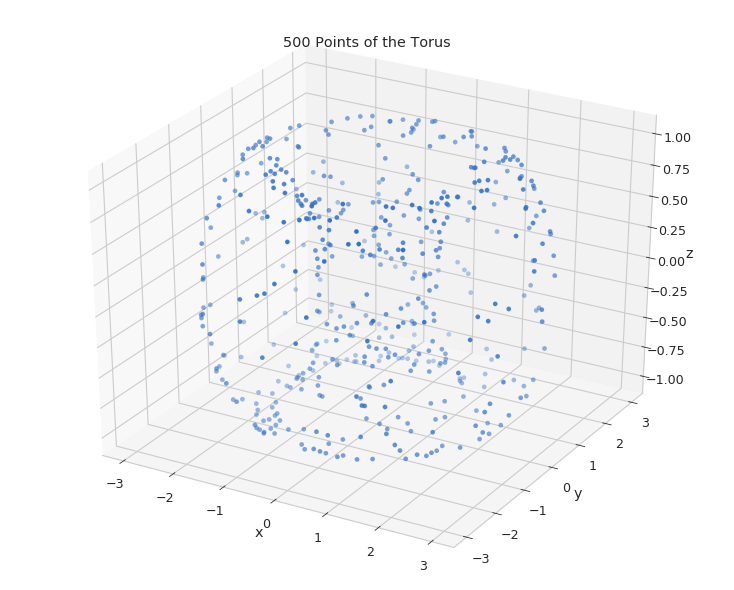

In [14]:
#Sample the points from the torus
n = 500
c = 2 #radius
a = 1 #tube radius

theta = 2*np.pi*np.random.rand(n)
phi = 2*np.pi*np.random.rand(n)

x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

torus = np.column_stack((x,y,z))

#Plots the Torus
fig = plt.figure()
ax = Axes3D(fig)
sca = ax.scatter(torus[:,0], torus[:,1], torus[:,2], cmap=plt.cm.jet)
ax.set_title(str(n) + ' Points of the Torus')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


plt.show()

In [15]:
prime = 2
dim = 3
max_rad = 2.
f = d.fill_rips(torus, dim, max_rad)
p = d.cohomology_persistence(f, prime, True)
dgms = d.init_diagrams(p, f)


###  Persistent Cohomology Bar Codes

Recall that the torus has betti numbers: (1,2,1)

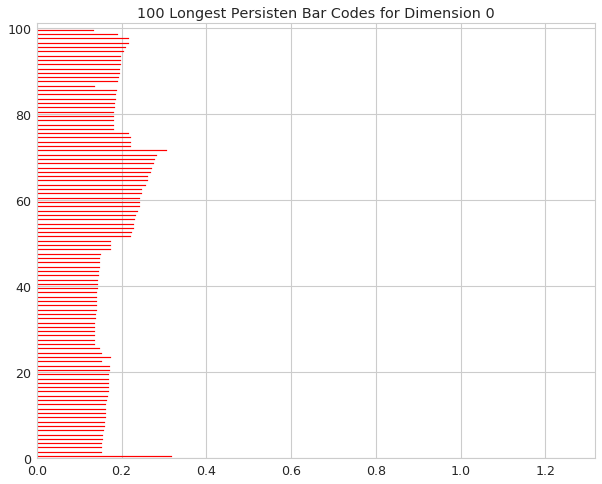

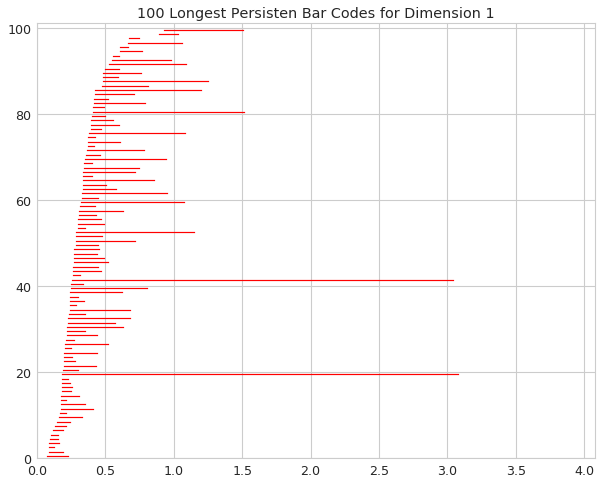

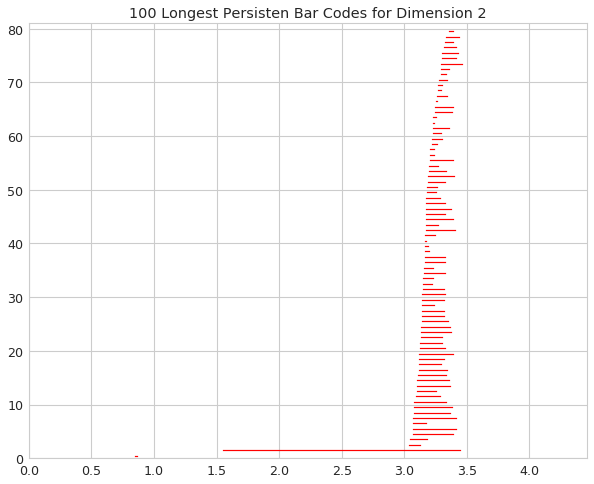

In [16]:
plot_persistence_diagram(dgms, 0, number_of_lines = 100)
plot_persistence_diagram(dgms, 1, number_of_lines = 100)
plot_persistence_diagram(dgms, 2, number_of_lines = 100)

### Cocycles

For our computations, we need an element: $\tau\in\hat{H}^1(K)$ to calculate the function from the manifold to $S^1$. Here we proceed with finding it:

In [17]:
#Extract the longest cocycle of dimension 1
pt = max(dgms[1], key = lambda pt: pt.death - pt.birth)
print(pt)
cocycle = p.cocycle(pt.data)
f_restricted = d.Filtration([s for s in f if s.data <= (pt.death + pt.birth)/2])
vertex_values = d.smooth(f_restricted, cocycle, prime)

(0.186323,3.07636)


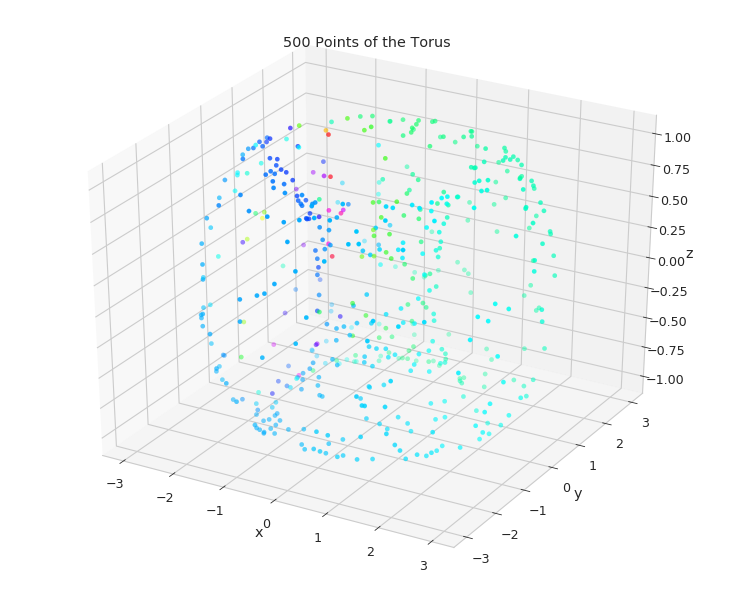

In [19]:
#Plots the Torus
fig = plt.figure()
ax = Axes3D(fig)
sca = ax.scatter(torus[:,0], torus[:,1], torus[:,2], c = vertex_values, cmap = 'hsv')
ax.set_title(str(n) + ' Points of the Torus')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


plt.show()